In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pyfftw.interfaces.numpy_fft  
np.fft = pyfftw.interfaces.numpy_fft 

matplotlib.rcParams.update({'mathtext.default':'regular'})
matplotlib.rcParams.update({'font.size': 8})
matplotlib.rcParams.update({'axes.labelweight': 'bold'})
matplotlib.rcParams.update({'axes.titleweight': 'bold'})

In [2]:
def radial_mask(r,cx=128,cy=128,sx=np.arange(0, 128),sy=np.arange(0, 128),delta = 1):
    ind = (sx[np.newaxis, :] - cx)**2 + (sy[:, np.newaxis] - cy)**2
    ind1 = ind <= ((r[0] + delta)**2) 
    ind2 = ind > (r[0]**2)
    return ind1 * ind2

# Read and process image

In [3]:
image = plt.imread('./c0911b81ee5266fa.jpg')
image = np.sum(image, axis=2)
image = image[:np.min(image.shape),:np.min(image.shape)]
image = image.astype('float')
image = image[180:-181,180:-181 ]

image = image - image.mean()
image = image - image.min()
image = image/image.max() 

In [4]:
image.shape

(360, 360)

## Show image and its FT power spectrum 

In [5]:
r = np.arange(180).reshape(180,1) 
radial_masks = np.apply_along_axis(radial_mask, 1, r, int(image.shape[0]/2), int(image.shape[0]/2), \
                                 np.arange(0, image.shape[0]), np.arange(0, image.shape[0]), 1 )

In [6]:
radial_masks.shape

(180, 360, 360)

In [7]:
ft_2d = np.fft.fft2(image)
ft_2d = np.fft.fftshift(ft_2d)
ft_2d = np.abs(ft_2d)

ft_2d[radial_masks[170]] = 0
ft_2d[radial_masks[85]] = 0
ft_2d[radial_masks[42]] = 0

/Users/rzepiela/anaconda/envs/py37_tf2/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app


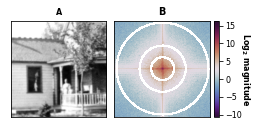

In [8]:
fig = plt.figure(figsize=(2*1.75, 1.7))

#subplot 1
ax1 = plt.Axes(fig, [0.03, 0.02, 0.38, 0.95]) 
fig.add_axes(ax1)
ax1.imshow(image, cmap='gray')

plt.xticks([])
plt.yticks([])
ax1.set_title('A', size=8)

#subplot 2
ax2 = plt.Axes(fig, [0.44, 0.0, 0.415, 0.99]) 
fig.add_axes(ax2)
im = ax2.imshow(np.log2(ft_2d), cmap='twilight_shifted')

plt.xticks([])
plt.yticks([])
ax2.set_title('B')

divider = make_axes_locatable(ax2)
cax = divider.new_horizontal(size="5%", pad=0.05)
fig = ax2.get_figure()
fig.add_axes(cax)
cbar = plt.colorbar(im ,cax=cax)
cbar.set_label(r'$Log_2$ magnitude', rotation=270,labelpad=10)

fig.savefig('figure_1.png', dpi=300) 